# Human Activity Recognition

In [1]:
# !gdown https://drive.google.com/uc?id=1ypa5iZ1dLDO-zGRO_yDXrJnMvjRGUG4v

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
import myutils as my


In [3]:
human = pd.read_csv('train.csv')
human.shape

(7352, 563)

### 데이터 준비
- 결측치
- 중복치
- X, y 분리
- y값 인코딩
- 정규화(표준화)
- GridSearchCV : 베스트 모델 찾기
- test파일 읽어서 score 계산하기

In [4]:
human.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [5]:
human['Activity'].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [6]:
human.duplicated().sum()

0

In [7]:
df = human.copy()

In [8]:
X = df.drop('Activity', axis = 1)
y = df['Activity']

In [9]:
df['Activity'] = df['Activity'].map({
    'LAYING' : 0,
    'STANDING' : 1,
    'SITTING' : 2,
    'WALKING' : 3,
    'WALKING_UPSTAIRS' : 4,
    'WALKING_DOWNSTAIRS' : 5,
})

In [10]:
df['Activity'].head()

0    1
1    1
2    1
3    1
4    1
Name: Activity, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [12]:
print(X_train.shape,X_test.shape)
print(y_train.shape, y_test.shape)

(5881, 562) (1471, 562)
(5881,) (1471,)


In [13]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
y_train = y_train.values
X_test = scaler.transform(X_test)
y_test = y_test.values

In [14]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [15]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [16]:
clf.score(X_train, y_train)

0.9906478490052713

In [17]:
clf.coef_

array([[-0.0626066 , -0.00647704,  0.03227984, ..., -0.12824971,
        -0.07895359, -0.34010562],
       [-0.04540853,  0.00459009,  0.00614607, ..., -0.1426792 ,
        -0.06115709, -0.04863233],
       [-0.04566116, -0.00489361, -0.00867653, ..., -0.09771184,
        -0.01796391, -0.02828514],
       ...,
       [-0.08313574, -0.10813339, -0.07516248, ...,  0.11137033,
         0.03524694, -0.10596843],
       [ 0.0414818 ,  0.03360106,  0.25979964, ..., -0.30166398,
         0.03118722, -0.14835999],
       [ 0.31225853,  0.17272285,  0.28643678, ..., -0.49201436,
        -0.34028018,  0.01234275]])

In [18]:
clf.intercept_

array([ 1.86663701,  0.76798885,  1.1895755 ,  0.95714208,  0.99208565,
        0.19651989,  2.06056175,  1.4230915 ,  1.68233201,  2.16051576,
        1.63695536,  2.06429262, -3.82479501, -3.82486618, -1.30862731])

In [19]:
clf.score(X_test, y_test)

0.9891230455472467

In [20]:
y_pred = clf.predict(X_test)
y_pred

array(['WALKING_UPSTAIRS', 'LAYING', 'SITTING', ..., 'LAYING', 'LAYING',
       'STANDING'], dtype=object)

In [21]:
y_test

array(['WALKING_UPSTAIRS', 'LAYING', 'SITTING', ..., 'LAYING', 'LAYING',
       'STANDING'], dtype=object)

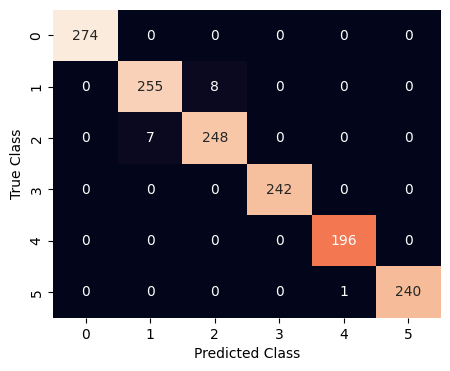

In [22]:
my.plot_confusion_matrix(y_test,y_pred)

In [23]:
my.print_score(y_test, y_pred, average='macro')

accuracy: 0.9891230455472467
precision: 0.989492716769352
recall: 0.9896635651773186


In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
names =['linear', 'linearSVC', 'poly', 'rbf','knn_5','knn_9']
models = [
    SVC(kernel ='linear', C=1),
    LinearSVC(C=1,max_iter=1000),
    SVC(kernel='poly', degree=3),
    SVC(kernel='rbf', C=1, gamma=0.7),
    KNeighborsClassifier(n_neighbors=5),
    KNeighborsClassifier(n_neighbors=9)
]

scores = {}
for name, model in zip(names, models):
    model.fit(X_train, y_train)
    score = model.score(X_train, y_train)
    print(name,score)
    scores[name] = score

linear 0.9906478490052713


C:\Users\023\anaconda3\envs\flyai\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


linearSVC 0.9945587485121578
poly 0.987757184152355
rbf 1.0
knn_5 0.985206597517429
knn_9 0.9760244856316953


In [25]:
scores

{'linear': 0.9906478490052713,
 'linearSVC': 0.9945587485121578,
 'poly': 0.987757184152355,
 'rbf': 1.0,
 'knn_5': 0.985206597517429,
 'knn_9': 0.9760244856316953}

<AxesSubplot: >

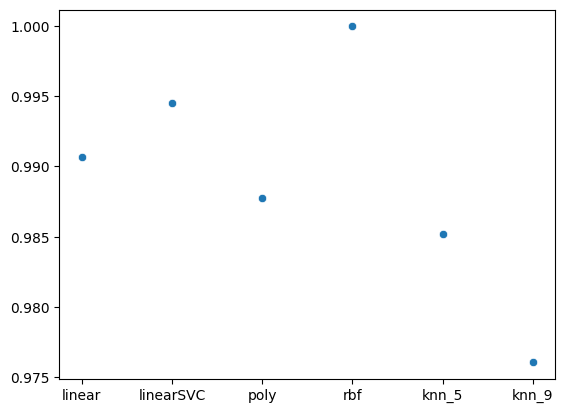

In [26]:
sns.scatterplot(data=scores)

In [45]:
param_range = [0.001,0.01, 0.1,1,10,100,1000]
params = [
    {
        'C' : param_range,
        'gamma' : param_range,
        'kernel' : ['rbf']
    },
    {
        'C' : param_range,
        'kernel' : ['linear']
    }
    ,
    {
        'C' : param_range,
        'degree' : [2,3],
        'kernel' : ['poly']
    }
]
params

[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
  'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
  'kernel': ['rbf']},
 {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
 {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
  'degree': [2, 3],
  'kernel': ['poly']}]

In [46]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [47]:
clf = SVC(random_state = 2023)
gs = GridSearchCV(estimator = clf,
                 scoring = 'accuracy',
                 param_grid = params,
                 cv = 3,
                 n_jobs = -1,
                  verbose=3
                 )
gs.fit(X_train,y_train)

Fitting 3 folds for each of 70 candidates, totalling 210 fits


GridSearchCV(cv=3, estimator=SVC(random_state=2023), n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'kernel': ['rbf']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'kernel': ['linear']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'degree': [2, 3], 'kernel': ['poly']}],
             scoring='accuracy', verbose=3)

In [48]:
gs.best_estimator_

SVC(C=100, gamma=0.1, random_state=2023)

In [49]:
gs.best_score_

0.9901376154745426

In [50]:
gs.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [63]:
clf = SVC(C=100, gamma= 0.1, kernel= 'rbf')
clf.fit(X_train, y_train)
clf.score(X_train, y_train)
clf.score(X_test, y_test)

0.9925220938137321

In [64]:
test = pd.read_csv('test.csv')
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [65]:
TX = test.iloc[:,:-1]
Ty = test.iloc[:,-1]

In [66]:
scaler = MinMaxScaler()
scaler.fit(X_train)

TX = scaler.transform(TX)
Ty = Ty.values

C:\Users\023\anaconda3\envs\flyai\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [67]:
type(TX)

numpy.ndarray

In [68]:
clf.score(TX, Ty)

0.14251781472684086